In [1]:
from composable_pipeline import ComposableOverlay

ol = ComposableOverlay("./overlay/cv_dfx_4_pr.bit")
cpipe = ol.composable

In [2]:
cpipe.c_dict.loaded

{'video/composable/colorthresholding_accel': {'ci': [14],
  'dfx': False,
  'loaded': True,
  'modtype': 'colorthresholding_accel',
  'pi': [14]},
 'video/composable/filter2d_accel': {'ci': [5],
  'dfx': False,
  'loaded': True,
  'modtype': 'filter2d_accel',
  'pi': [5]},
 'video/composable/gray2rgb_accel': {'ci': [3],
  'dfx': False,
  'loaded': True,
  'modtype': 'gray2rgb_accel',
  'pi': [3]},
 'video/composable/lut_accel': {'ci': [13],
  'dfx': False,
  'loaded': True,
  'modtype': 'LUT_accel',
  'pi': [13]},
 'video/composable/rgb2gray_accel': {'ci': [2],
  'dfx': False,
  'loaded': True,
  'modtype': 'rgb2gray_accel',
  'pi': [2]},
 'video/composable/rgb2hsv_accel': {'ci': [4],
  'dfx': False,
  'loaded': True,
  'modtype': 'rgb2hsv_accel',
  'pi': [4]},
 'video/hdmi_in/color_convert': {'ci': [0],
  'dfx': False,
  'loaded': True,
  'modtype': 'color_convert'},
 'video/hdmi_in/pixel_pack': {'dfx': False,
  'loaded': True,
  'modtype': 'pixel_pack',
  'pi': [0]},
 'video/hdmi_out

In [3]:
hdmi_in = ol.video.hdmi_in
hdmi_out = ol.video.hdmi_out

hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

In [15]:
hdmi_in.tie(hdmi_out)

In [6]:
video_in_in = cpipe.video.hdmi_in.color_convert
video_in_out = cpipe.video.hdmi_in.pixel_pack
video_out_in = cpipe.video.hdmi_out.pixel_unpack
video_out_out =  cpipe.video.hdmi_out.color_convert

rgb2gray = cpipe.video.composable.rgb2gray_accel
gray2rgb = cpipe.video.composable.gray2rgb_accel

def set_res(ip, cols, rows):
    ip.cols = cols
    ip.rows = rows

cols = 1920
rows = 1080
set_res(rgb2gray, cols, rows)
set_res(gray2rgb, cols, rows)
# set_res(fast, cols, rows)
# set_res(harr, cols, rows)

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Problem:</h4>
Among following 4 pipeline, only the second one works!!!
</div>

Try the left three, it's interesting to gueses the internal logic

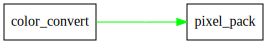

In [25]:
# video_pipeline = [video_out_in, video_out_out]
video_pipeline = [video_in_in, video_in_out]
# video_pipeline = [video_in_in, video_out_out]
# video_pipeline = [video_out_in, video_in_out]

cpipe.compose(video_pipeline)

cpipe.graph

In [8]:
import time

numframes = 600
start = time.time()

for _ in range(numframes):
    f = hdmi_in.readframe()
    hdmi_out.writeframe(f)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  34.66693412987116


In [26]:
hdmi_out.close()
hdmi_in.close()